### Import Packages & Data

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [24]:
#PLT Params:
COLOR = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['figure.figsize'] = [30, 6]

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/Apress/advanced-forecasting-python/main/Ch03_Earthquake_database.csv')

In [5]:
data.to_csv('earthquake_data.csv')

In [6]:
eq = pd.read_csv('earthquake_data.csv', parse_dates= ['Date'],encoding='utf-8-sig')
eq.describe()

,Unnamed: 0,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,11705.500000,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,6758.606587,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,0.000000,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,5852.750000,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,11705.500000,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,17558.250000,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,23411.000000,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


### Converting data to correct format in order to "Forecast the number of strong earthquakes per year"

In [7]:
# Getting Year column:
eq['year'] = pd.to_datetime(eq['Date'], utc=True).dt.year

In [8]:
#Filtering data:
eq = eq[eq['Magnitude'] >= 7]

In [9]:
#Getting earthquakes per year:
earthquakes_per_year = eq.groupby('year').count()
earthquakes_per_year

,Unnamed: 0,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
year,,,,,,,,,,,,,,,,,,,,,
1965,18,18,18,18,18,18,18,0,0,18,...,0,0,0,0,0,18,18,18,18,18
1966,9,9,9,9,9,9,9,0,0,9,...,0,0,0,0,0,9,9,9,9,9
1967,11,11,11,11,11,11,11,0,0,11,...,0,0,0,0,0,11,11,11,11,11
1968,22,22,22,22,22,22,22,0,0,22,...,0,0,0,0,0,22,22,22,22,22
1969,14,14,14,14,14,14,14,0,0,14,...,0,0,0,0,0,14,14,14,14,14
1970,17,17,17,17,17,17,17,0,0,17,...,0,0,0,0,0,17,17,17,17,17
1971,20,20,20,20,20,20,20,0,0,20,...,0,0,0,0,0,20,20,20,20,20
1972,16,16,16,16,16,16,16,0,0,16,...,0,0,0,0,0,16,16,16,16,16
1973,9,9,9,9,9,9,9,0,0,9,...,0,0,0,0,0,9,9,9,9,9


In [10]:
#Only keeping actual date count and year:
earthquakes_per_year = earthquakes_per_year.iloc[1:-2, 0]
earthquakes_per_year

year
1966     9
1967    11
1968    22
1969    14
1970    17
1971    20
1972    16
1973     9
1974    11
1975    13
1976    14
1977    10
1978    12
1979     8
1980     6
1981    11
1982     7
1983    14
1984    14
1985    15
1986    11
1987    13
1988    11
1989     8
1990    18
1991    17
1992    13
1993    12
1994    13
1995    20
1996    15
1997    16
1998    12
1999    18
2000    15
2001    16
2002    13
2003    15
2004    16
2005    11
2006    11
2007    18
2008    12
2009    17
2010    24
2011    20
2012    16
2013    19
2014    12
Name: Unnamed: 0, dtype: int64

<module 'matplotlib' from 'C:\\Users\\fede2\\Anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\__init__.py'>

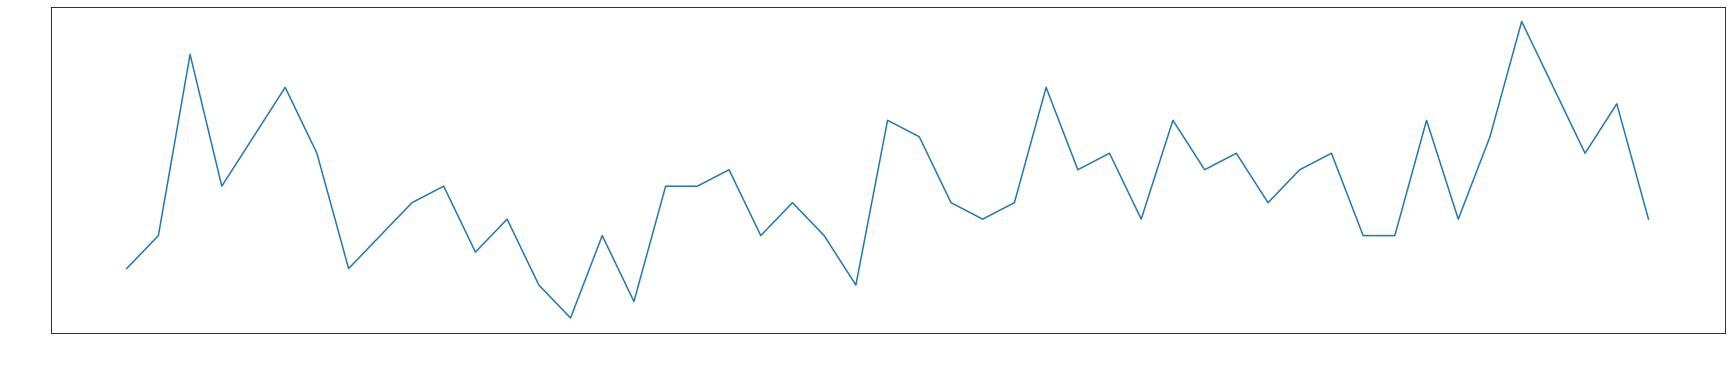

In [25]:
#Let's plot it:
ax = earthquakes_per_year.plot()
ax.set_ylabel("Number of Earthquakes")
plt

### Calculating Numeric Correlation:

<module 'matplotlib' from 'C:\\Users\\fede2\\Anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\__init__.py'>

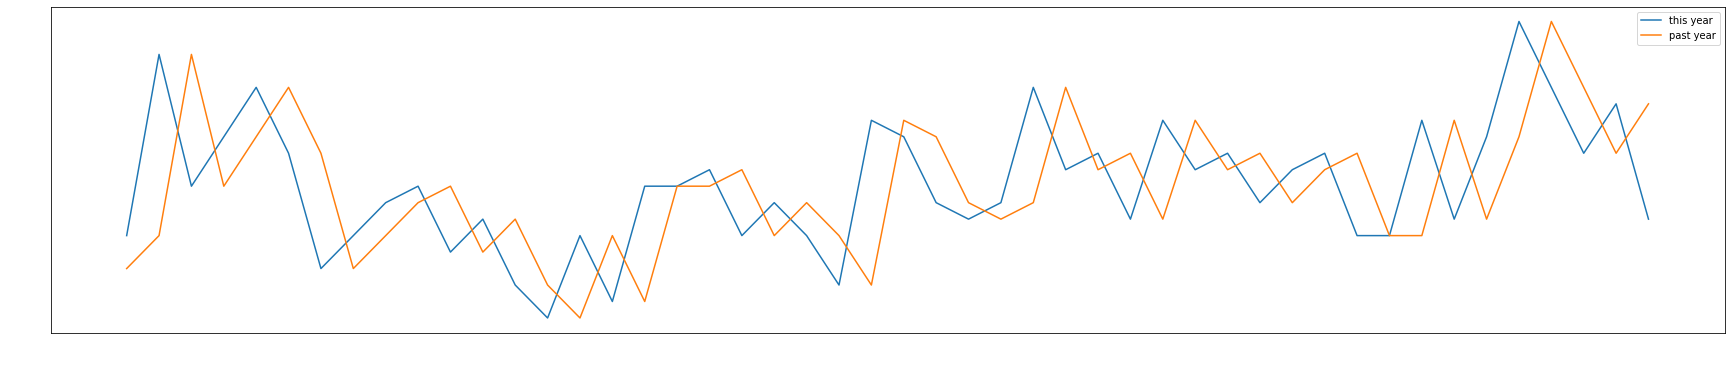

In [26]:
#Shift year column by one to compare this year with previous year correlation:
shifts = pd.DataFrame(
    {
        'this year' : earthquakes_per_year,
        'past year' : earthquakes_per_year.shift(1)
    }
)
#Take out NAs:
shifts = shifts.dropna()
ax = shifts.plot()
ax.set_ylabel('Number of Earthquakes')
plt

In [13]:
#Correlation Matrix:
shifts.corr()

,this year,past year
this year,1.000000,0.313667
past year,0.313667,1.000000


### Stationarity and ADF Test:

In [14]:
#Using the Augmented Dickey Fuller test to check if the data has trend:
from statsmodels.tsa.stattools import adfuller

result = adfuller(earthquakes_per_year.dropna())
print(result)
print()
pvalue = result[1]
if pvalue < 0.05:
    print('stationary')
else:
    print('non-stationary')

(-5.008806133844326, 2.1319566272140616e-05, 0, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, 202.7529751691226)

stationary


<module 'matplotlib' from 'C:\\Users\\fede2\\Anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\__init__.py'>

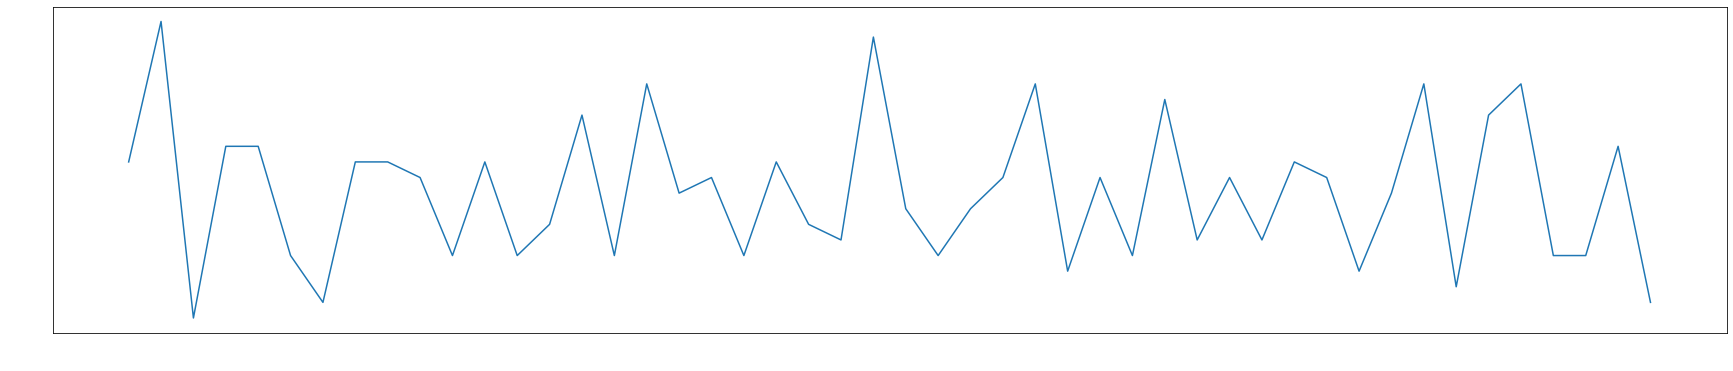

In [27]:
# Differencing the data just in case in order to remove possible trend:
differenced_data = earthquakes_per_year.diff().dropna()

ax = differenced_data.plot()
ax.set_ylabel('Differenced Number of Earthquakes')
plt

In [16]:
#Recalculating correlation:
shifts_diff = pd.DataFrame(
    {
        'this year' : differenced_data,
        'past year' : differenced_data.shift(1)
    }
)
shifts_diff.dropna().corr()

,this year,past year
this year,1.000000,-0.376859
past year,-0.376859,1.000000


### Autocorrelation Lags:

<module 'matplotlib' from 'C:\\Users\\fede2\\Anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\__init__.py'>

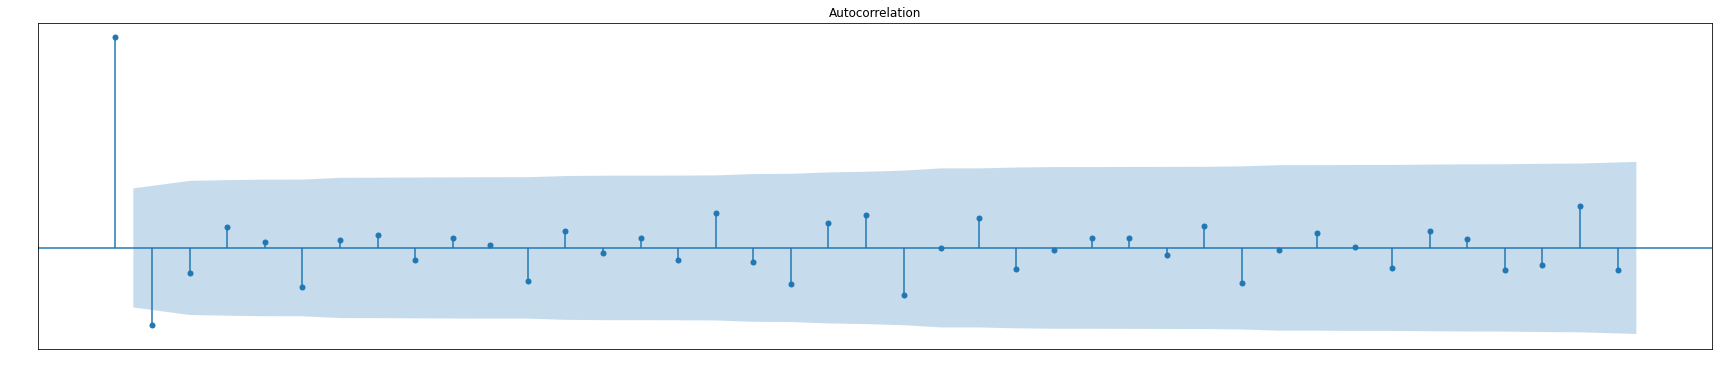

In [28]:
#After having calculating correlation, it is also useful to investigate autocorrelation on multiple lags at the same time.
#Here, the number of lags represent the number of steps back in time that have an impact on the present value.
#Using ACF below:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(differenced_data, lags=40)
plt
#Notice only Lag 1 is relevant (outside of shaded area), and since it's lag 1 (data shifted by 1 year) it matches the correlation we found before of -0.37.

### Partial Autocorrelation Lags:

<module 'matplotlib' from 'C:\\Users\\fede2\\Anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\__init__.py'>

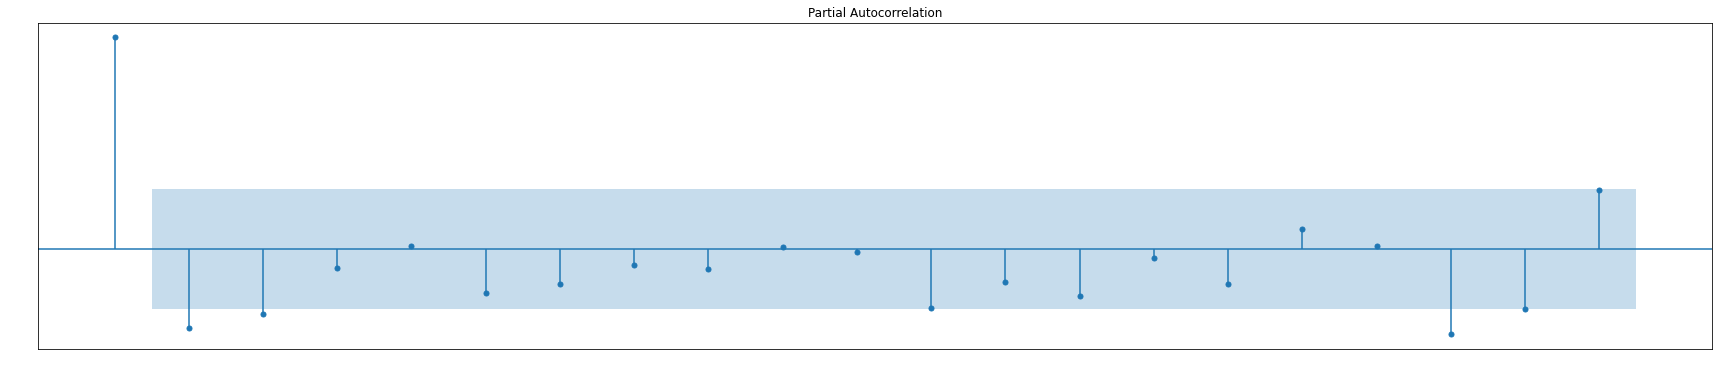

In [29]:
#PACF to investigate autocorrelation conditional on earlier lags:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(differenced_data, lags=20)
plt
#Possible lags to include given below: AR 1, 2, 11, 18, 19 (Order of Time Series)

### Estimating AR Using Yule-Walker Equation:

In [44]:
from statsmodels.regression.linear_model import yule_walker

#Testing AR(1) Model:
coefficients, sigma = yule_walker(differenced_data, order=3)
print('coefficients: ', -coefficients)
print('sigma: ', sigma)

coefficients:  [0.51636104 0.34981679 0.08922855]
sigma:  3.99051873543974


<module 'matplotlib' from 'C:\\Users\\fede2\\Anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\__init__.py'>

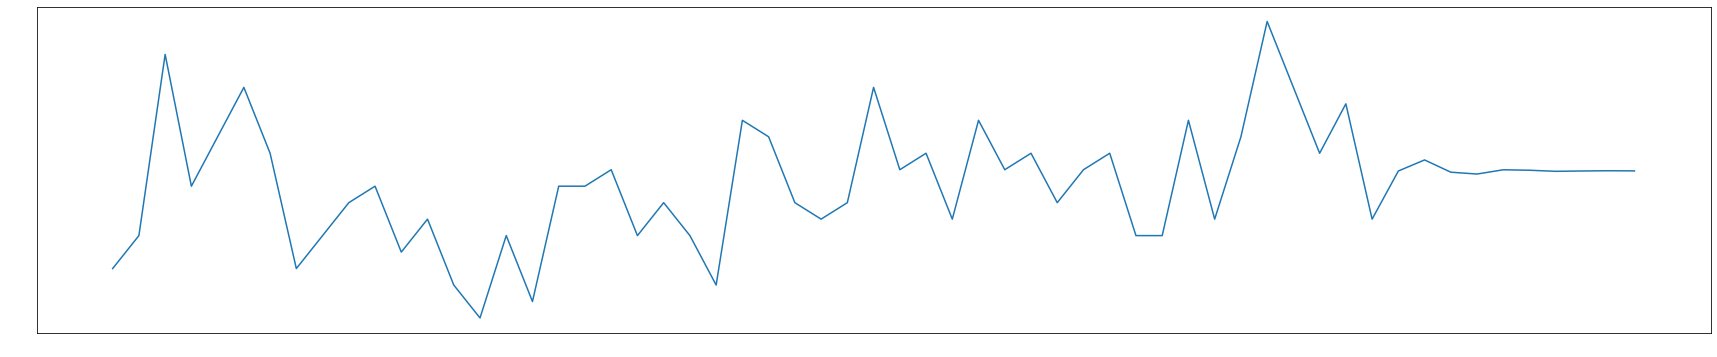

In [45]:
#Making a prediction using AR(3) n_steps into the future:
n_steps = 10
val_list = list(differenced_data)

#Reverse the above list so that the order corresponds with the order of the coefficients:
val_list.reverse()

for year in range(n_steps):
    #Here we're applying the AR Model equation, in which the current/next value is equal to the summation of lagged values multiplied by the coefficient (phis):
    new_val = 0
    for ts_order in range(len(coefficients)):
        new_val += coefficients[ts_order] * val_list[ts_order]
        
    #Insert new values at the beginning of the list:
    val_list.insert(0, new_val)
    
#Redo the reversing of the list to get back to the initial order of time:
val_list.reverse()

#In order to undo differencing, add the original first value back and do a cumulative sum:
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

#Plot:
plt.pyplot.plot(range(1966, 2025), new_val_list)
plt

### Hyperparameter Tuning for AR Model:

In [21]:
#AR(1) model above is pretty bad given the flat line prediction, so performing here below train/test split and grid search for best coefficient number (time series order):
from sklearn.metrics import r2_score

def evaluate(order):
    #Taking out the last 10 years from training to use them in testing:
    train = list(differenced_data)[:-10] 
    test = list(earthquakes_per_year)[-10:]
    
    #Fit the model:
    coefficients, sigma = yule_walker(train, order=order)
    
    #Making a prediction using AR(order) n_steps into the future:
    n_steps = 10
    val_list = list(train)

    #Reverse the above list so that the order corresponds with the order of the coefficients:
    val_list.reverse()

    for year in range(n_steps):
        #Here we're applying the AR Model equation, in which the current/next value is equal to the summation of lagged values multiplied by the coefficient (phis):
        new_val = 0
        for ts_order in range(len(coefficients)):
            new_val += coefficients[ts_order] * val_list[ts_order]
        #Insert new values at the beginning of the list:
        val_list.insert(0, new_val)

    #Redo the reversing of the list to get back to the initial order of time:
    val_list.reverse()

    #In order to undo differencing, add the original first value back and do a cumulative sum:
    val_list = [earthquakes_per_year.values[0]] + val_list
    new_val_list = pd.Series(val_list).cumsum()
    
    #Set up validation:
    validation = pd.DataFrame({'original':earthquakes_per_year.reset_index(drop=True),
                               'pred':new_val_list})
    
    return r2_score(validation.iloc[-10:, 0], validation.iloc[-10:, 1])

In [22]:
#Perform grid search and evaluate models:

orders = []
r2scores = []
for order in range(1, 31):
    orders.append(order)
    r2scores.append( evaluate(order) )

#Results table:
results = pd.DataFrame({'TimeSeries Order':orders, 'R2 Scores':r2scores})
results.sort_values(by=['R2 Scores'], ascending=False)[:5] #Top Five Best AR Models

,TimeSeries Order,R2 Scores
18,19,0.133872
15,16,0.020518
14,15,0.011684
0,1,-0.001747
1,2,-0.008880


### AR(19) Train-Test:

<module 'matplotlib' from 'C:\\Users\\fede2\\Anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\__init__.py'>

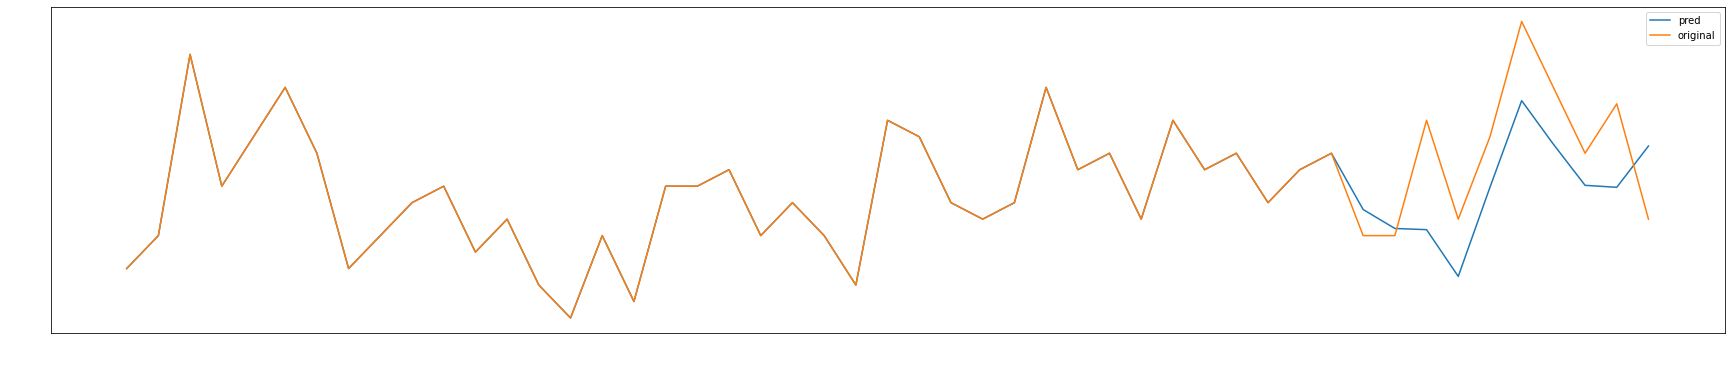

In [52]:
#Taking out the last 10 years from training to use them in testing:
train = list(differenced_data)[:-10] 
test = list(earthquakes_per_year)[-10:]

#Fit the model:
coefficients, sigma = yule_walker(train, order=19) #Using grid search, this came out to be the best time series order to use.

#Making a prediction using AR(order) n_steps into the future:
n_steps = 10
val_list = list(train)

#Reverse the above list so that the order corresponds with the order of the coefficients:
val_list.reverse()

for year in range(n_steps):
    #Here we're applying the AR Model equation, in which the current/next value is equal to the summation of lagged values multiplied by the coefficient (phis):
    new_val = 0
    for ts_order in range(len(coefficients)):
        new_val += coefficients[ts_order] * val_list[ts_order]
    #Insert new values at the beginning of the list:
    val_list.insert(0, new_val)

#Redo the reversing of the list to get back to the initial order of time:
val_list.reverse()

#In order to undo differencing, add the original first value back and do a cumulative sum:
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

#Set up validation:
validation = pd.DataFrame({'pred':new_val_list,
                           'original':earthquakes_per_year.reset_index(drop=True)})
validation['year'] = range(1966, 2015)
validation = validation.set_index('year')

ax = validation.plot()
ax.set_ylabel('Number of Earthquakes')
plt

### AR(19):

<module 'matplotlib' from 'C:\\Users\\fede2\\Anaconda3\\envs\\tensorflow_gpuenv\\lib\\site-packages\\matplotlib\\__init__.py'>

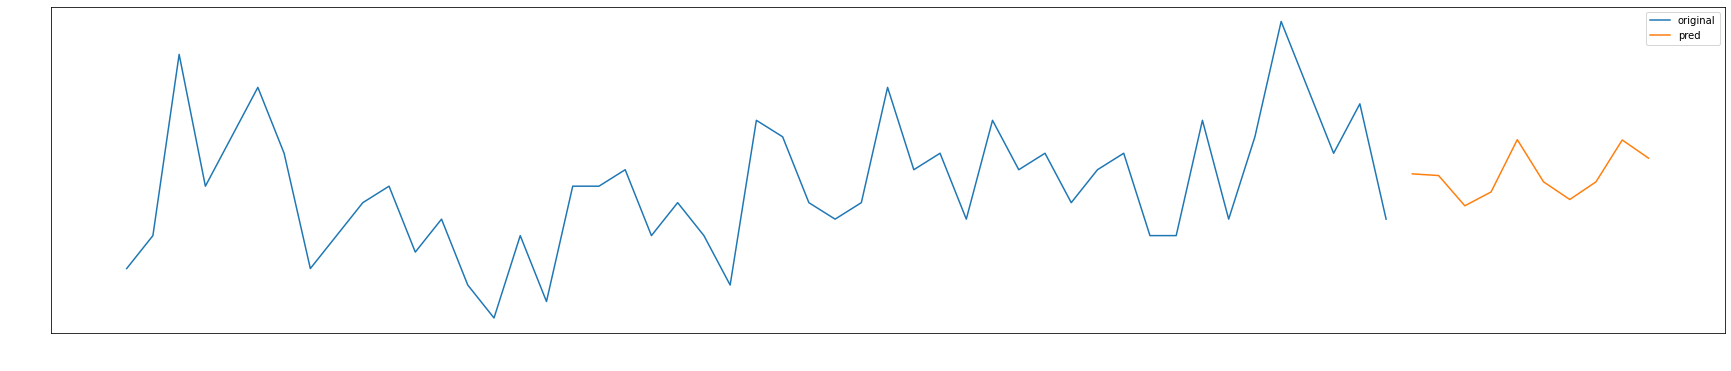

In [51]:
coefficients, sigma = yule_walker(differenced_data, order=19)

#Making a prediction using AR(3) n_steps into the future:
n_steps = 10
val_list = list(differenced_data)

#Reverse the above list so that the order corresponds with the order of the coefficients:
val_list.reverse()

for year in range(n_steps):
    #Here we're applying the AR Model equation, in which the current/next value is equal to the summation of lagged values multiplied by the coefficient (phis):
    new_val = 0
    for ts_order in range(len(coefficients)):
        new_val += coefficients[ts_order] * val_list[ts_order]
        
    #Insert new values at the beginning of the list:
    val_list.insert(0, new_val)
    
#Redo the reversing of the list to get back to the initial order of time:
val_list.reverse()

#In order to undo differencing, add the original first value back and do a cumulative sum:
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

#Plot:
toPlot = pd.DataFrame({'original':new_val_list[:-10],
                       'pred':new_val_list[-10:]})
toPlot['year'] = range(1966, 2025)
toPlot = toPlot.set_index('year')

ax = toPlot.plot()
ax.set_ylabel('Number of Earthquakes')
plt